In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

In [2]:
def giveFeaturesOf_Image(image):
    border_percentage = 0.03 #try and test
    # print("Image shape: ", image.shape)
    rows,cols,_ = image.shape
    border_rows = int(rows * border_percentage)
    border_cols = int(cols * border_percentage)
    roi = image[border_rows:rows - border_rows, border_cols:cols - border_cols] # Region of Interset
    # print("ROI shape: ", roi.shape)
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    # Image.fromarray(gray,'L')
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Image.fromarray(blurred,'L')
    hist = cv2.calcHist([blurred], [0], None, [256], [0, 256])
    # plt.plot(hist, color='black')
    # plt.xlabel('Intensity Value')
    # plt.ylabel('Frequency')
    # plt.title('Histogram of Intensity Values')
    # plt.grid(True)
    # plt.show()

    _, binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
    # Image.fromarray(binary_image, 'L')
    hist_2 = cv2.calcHist([binary_image], [0], None, [256], [0, 256])

    # plt.plot(hist_2, color='black')
    # plt.xlabel('Intensity Value')
    # plt.ylabel('Frequency')
    # plt.title('Histogram of Intensity Values')
    # plt.grid(True)
    # plt.show()

    #Mean
    mean_intesity = np.mean(blurred[binary_image == 0])

    #standard deviation
    std_dev = np.std(blurred[binary_image == 0])

    #Range
    range_values = np.max(blurred[binary_image == 0]) - np.min(blurred[binary_image == 0])


    #Stroke Density
    num_pixels = np.sum(binary_image == 0)
    num_gray_levels = len(np.unique(blurred[binary_image == 0]))
    stroke_density = num_gray_levels / num_pixels

    #Entropy
    flat_image = blurred[binary_image == 0].flatten()
    histogram , gray_levels = np.histogram(flat_image, bins=range(257))
    gray_levels = gray_levels[:-1]
    prob_distribution = histogram / len(flat_image)
    gray_levels = gray_levels[prob_distribution > 0]
    prob_distribution = prob_distribution[prob_distribution > 0]

    entropy = -np.sum(prob_distribution * np.log2(prob_distribution))


    #Kurtois
    # mean_value = np.mean(blurred[binary_image == 0])
    # std_dev = np.std(blurred[binary_image == 0])
    numerator = np.sum((blurred[binary_image == 0] - mean_intesity) ** 4)
    denominator = (len(blurred[binary_image == 0].flatten()) - 1) * (std_dev ** 4)
    kurtosis_value = numerator / denominator

    # I want these value append in the csv file
    # print("Mean: ", mean_intesity)
    # print("Standard Deviation: ", std_dev)
    # print("Range: ", range_values)
    # print("Stroke Density: ", stroke_density)
    # print("Entropy: ", entropy)
    # print("Kurtosis: ", kurtosis_value)

    return mean_intesity, std_dev, range_values, stroke_density, entropy, kurtosis_value





In [3]:
def calculate_compactness(image_path):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    
    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    
    if len(contours) > 0:
        contour = max(contours, key=cv2.contourArea)  
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, closed=True)

        
        compactness = (perimeter ** 2) / (4 * np.pi * area)
        return compactness
    else:
        return None
    



def calculate_solidity(image_path):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    
    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    
    if len(contours) > 0:
        contour = max(contours, key=cv2.contourArea)  # Use the largest contour
        area_component = cv2.contourArea(contour)

        
        convex_hull = cv2.convexHull(contour)

        
        area_convex_hull = cv2.contourArea(convex_hull)

        
        solidity = area_component / area_convex_hull
        return solidity
    else:
        return None

In [23]:
import cv2
import numpy as np

def giveFeaturesOf_Image(image_path):
    border_percentage = 0.03  # try and test
    image = cv2.imread(image_path)
    rows, cols, _ = image.shape
    border_rows = int(rows * border_percentage)
    border_cols = int(cols * border_percentage)
    roi = image[border_rows:rows - border_rows, border_cols:cols - border_cols]  # Region of Interest
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray,9)
    _, binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

    mean_intensity = np.mean(blurred[binary_image == 0])
    std_dev = np.std(blurred[binary_image == 0])
    range_values = np.max(blurred[binary_image == 0]) - np.min(blurred[binary_image == 0])

    num_pixels = np.sum(binary_image == 0)
    num_gray_levels = len(np.unique(blurred[binary_image == 0]))
    stroke_density = num_gray_levels / num_pixels

    flat_image = blurred[binary_image == 0].flatten()
    histogram, gray_levels = np.histogram(flat_image, bins=range(257))
    gray_levels = gray_levels[:-1]
    prob_distribution = histogram / len(flat_image)
    gray_levels = gray_levels[prob_distribution > 0]
    prob_distribution = prob_distribution[prob_distribution > 0]
    entropy = -np.sum(prob_distribution * np.log2(prob_distribution))

    numerator = np.sum((blurred[binary_image == 0] - mean_intensity) ** 4)
    denominator = (len(blurred[binary_image == 0].flatten()) - 1) * (std_dev ** 4)
    kurtosis_value = numerator / denominator

    compactness = calculate_compactness(image_path)

    solidity = calculate_solidity(image_path)
    

    

    return mean_intensity, std_dev, range_values, stroke_density, entropy, kurtosis_value,compactness,solidity


In [24]:
import csv

def append_values_to_csv(image_path, csv_file_path):
    
    values = giveFeaturesOf_Image(image_path)

    
    with open(csv_file_path, mode='a', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        
        if csv_file.tell() == 0:
            csv_writer.writerow(["Mean", "Standard Deviation", "Range", "Stroke Density", "Entropy", "Kurtosis","Compactness","Solidity"])
        csv_writer.writerow(values)


In [25]:
for i in range(1,40):
    image_path =    '/Users/swayampalrecha/Desktop/DIP PROJECT/Gujarati/' + str(i) + '.jpg'
    csv_file_path = "/Users/swayampalrecha/Desktop/DIP PROJECT/test.csv"
    append_values_to_csv(image_path, csv_file_path)

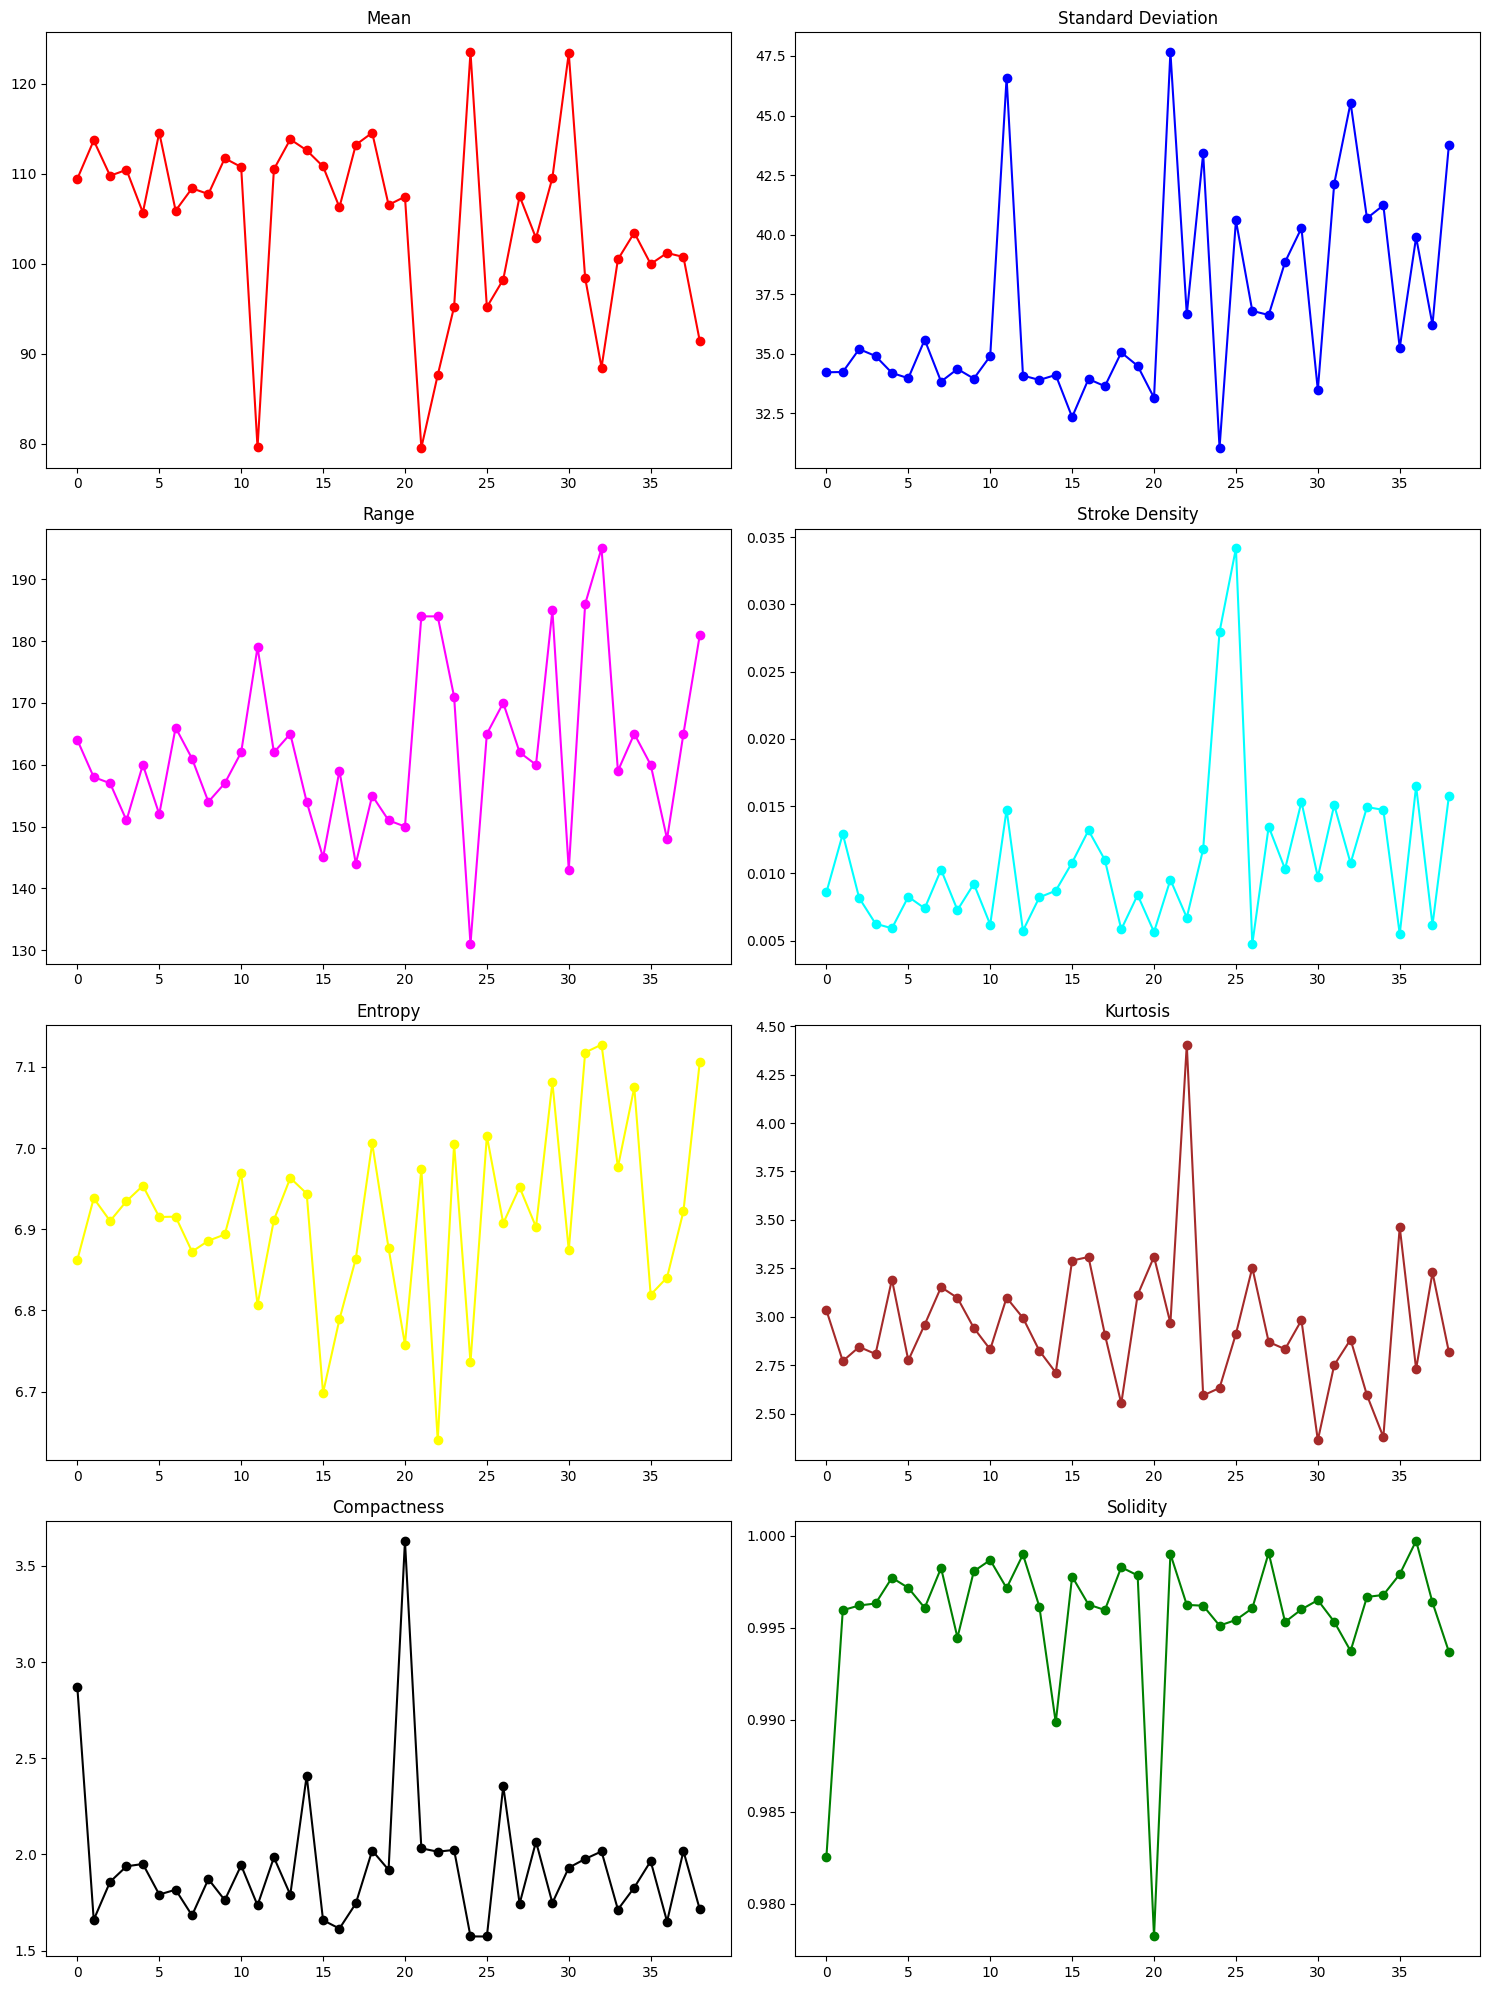

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('test.csv')


mean = data['Mean']
std_dev = data['Standard Deviation']
range_val = data['Range']
stroke_density = data['Stroke Density']
entropy = data['Entropy']
kurtosis = data['Kurtosis']
compactness = data['Compactness']
solidity = data['Solidity']


fig, axs = plt.subplots(4, 2, figsize=(15, 20))


axs[0, 0].plot(mean, marker='o',color='red', linestyle='-')
axs[0, 0].set_title('Mean')


axs[0, 1].plot(std_dev, marker='o',color='blue', linestyle='-')
axs[0, 1].set_title('Standard Deviation')


axs[1, 0].plot(range_val, marker='o',color='magenta', linestyle='-')
axs[1, 0].set_title('Range')


axs[1, 1].plot(stroke_density, marker='o',color='cyan', linestyle='-')
axs[1, 1].set_title('Stroke Density')


axs[2, 0].plot(entropy, marker='o',color='yellow', linestyle='-')
axs[2, 0].set_title('Entropy')


axs[2, 1].plot(kurtosis, marker='o',color='brown', linestyle='-')
axs[2, 1].set_title('Kurtosis')


axs[3, 0].plot(compactness, marker='o',color='black', linestyle='-')
axs[3, 0].set_title('Compactness')


axs[3, 1].plot(solidity, marker='o',color='green', linestyle='-')
axs[3, 1].set_title('Solidity')


plt.tight_layout()


plt.show()